# Supervised Machine Learning, Part 1

## Linear Regression

In linear regression, the aim is to predict a continuous varibale (meaning a numerical value, as opposed to a class) using a set of input variables. To train our model, we need to provide a **labeled dataset**. This labeled dataset contains explanatory variables (the variables used to predict the value) as well as the dependent variables (the true value). The algorihm tries to find a line, that best matches the true values.

### Task 1

Try to fit a linear regression to the data. Show the correlation between the variables `bill_length_mm` and `bill_depth_mm` (`bill_depth_mm` is the dependent variable). You can use the function `sns.lmplot` to achieve this. \

Do you see anything interesting? Are there other aspects of the data you would like to investigate?

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


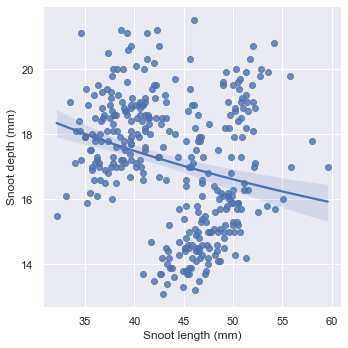

In [13]:
import seaborn as sns
sns.set_theme()
# %matplotlib widget

# Load the penguins dataset
penguins = sns.load_dataset("penguins")
print(penguins.head())
# Plot relation of snoot lenght and depth depending on species
g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm",
    height=5,
    # lowess=True
    logx=True
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

Same data, split up by species:

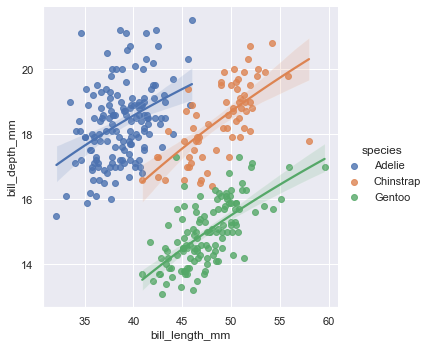

In [14]:
# Plot relation of snoot lenght and depth depending on species
# the parameter "hue" automatically colours datapoints by this variable, 
# and the lmplot function performs multiple linear regression with the "hue" parameter as the dependent variable.  
g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",  
    height=5,
    logx=True
)

## Support Vector Machines


[Documentation](https://scikit-learn.org/stable/modules/svm.html)

In [3]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

import pandas as pd
penguins2=penguins.copy()[penguins["species"]!= "Chinstrap"]
X = penguins2.dropna()[["bill_length_mm", "bill_depth_mm"]]
y = penguins2.dropna()["species"]



scaler = StandardScaler()
X.iloc[:] = scaler.fit_transform(X)

#encode strings as integers
y=y.astype("category").cat.codes


print(X[:5])
print(y[:5])

   bill_length_mm  bill_depth_mm
0       -0.701364       0.925911
1       -0.624514       0.277848
2       -0.470814       0.576954
4       -1.162463       1.225017
5       -0.662939       1.873079
0    0
1    0
2    0
4    0
5    0
dtype: int8


In [4]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

clf = svm.SVC(kernel= "linear")
clf.fit(X_train,y_train)


SVC(kernel='linear')

In [5]:
y_pred = clf.predict(X_test)

In [6]:
from sklearn.metrics import classification_report, confusion_matrix 

print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))




Confusion Matrix:
 [[37  0]
 [ 1 29]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      0.97      0.98        30

    accuracy                           0.99        67
   macro avg       0.99      0.98      0.98        67
weighted avg       0.99      0.99      0.99        67



In [7]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.figure(figsize=(10, 8))
# # Plotting our two-features-space
# sns.scatterplot(x=X_test.iloc[:, 0], 
#                 y=X_test.iloc[:, 1], 
#                 hue=y_pred, 
#                 s=20);

# print(clf.coef_)
# # Constructing a hyperplane using a formula.
# w = clf.coef_[0]           # w consists of 2 elements
# b = clf.intercept_[0]      # b consists of 1 element
# x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
# y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# # # Plotting a red hyperplane
# # plt.plot(x_points, y_points, c='r');

SVC(kernel='linear', random_state=32)

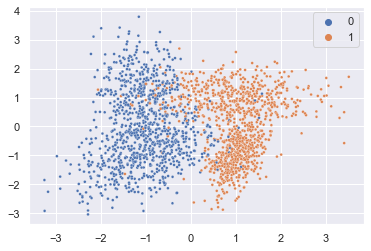

In [8]:
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_classification
# Creating a random dataset of 2,000 samples and only 2 features
# (for 2–dimensional space). And yeah, it's a binary classification
# here (`y` contains two classes: 0 and 1).
X, y = make_classification(n_samples=2000, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_classes=2,
                           random_state=32)
sns.scatterplot(x=X[:, 0], 
                y=X[:, 1], 
                hue=y, 
                s=8);
# Splitting our dataset by train and test parts.
# `stratify` is here to make our splitting balanced
# in terms of classes.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   test_size=0.3, stratify=y,
                                   random_state=32)
# And here we train our model. IMPORTANT: we use kernel='linear'.
svc_model = SVC(kernel='linear', random_state=32)
svc_model.fit(X_train, y_train)

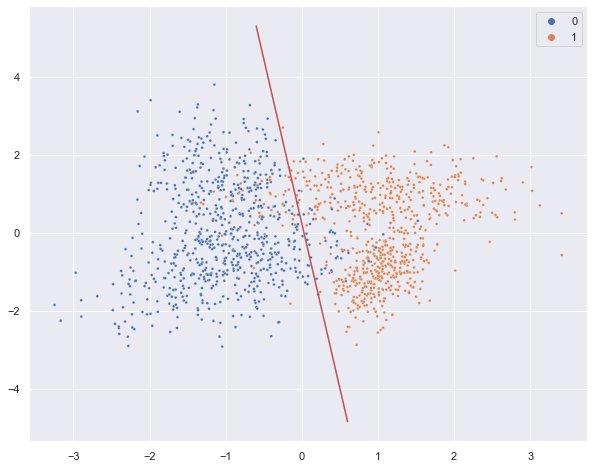

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=X_train[:, 0], 
                y=X_train[:, 1], 
                hue=y_train, 
                s=8);
# Constructing a hyperplane using a formula.
w = svc_model.coef_[0]           # w consists of 2 elements
b = svc_model.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-0.6,0.6)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');